In [191]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

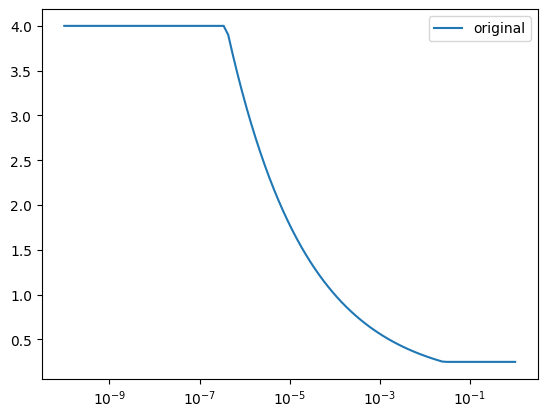

In [192]:
def original(error_estimate, step_tolerance):
    x = np.power(step_tolerance / error_estimate, 1/4)
    return np.clip(x, 0.25, 4.0)

def approx(error_estimate, step_tolerance):
    A = step_tolerance / error_estimate
    def iterate(x):
        return (3*x+A/x**3)/4
    x = A**(1/2)
    for _ in range(2):
        x = iterate(x)
    return np.clip(x, 0.25, 4.0)

x = np.linspace(-10, 0, 100)
x = np.power(10, x)
y1 = original(x, 1e-4)
y2 = approx(x, 1e-4)

plt.gca().set_xscale("log")
plt.plot(x, y1, label="original")
#plt.plot(x, y2, label="approx")
plt.legend()

[ 1.10881695e+03  2.47683579e-01 -5.15663535e+03  2.52118316e-01
  2.72515045e+03  6.51059769e-03] [[ 1.48946256e+15  1.28410197e+11 -3.83235253e+15 -6.81111495e+10
   1.27286064e+15 -1.61758423e+09]
 [ 1.28410197e+11  2.39055589e+07 -8.65448276e+10 -1.40205345e+07
   1.49512569e+11 -2.66499518e+05]
 [-3.83235253e+15 -8.65448276e+10  1.46835544e+16 -1.32651303e+10
  -2.90903120e+15  2.61904380e+09]
 [-6.81111495e+10 -1.40205345e+07 -1.32651303e+10  2.11792701e+07
  -8.91383371e+10 -1.78456318e+05]
 [ 1.27286064e+15  1.49512569e+11 -2.90903120e+15 -8.91383371e+10
   2.81836898e+15 -1.62931368e+09]
 [-1.61758423e+09 -2.66499518e+05  2.61904380e+09 -1.78456318e+05
  -1.62931368e+09  1.16202304e+04]]


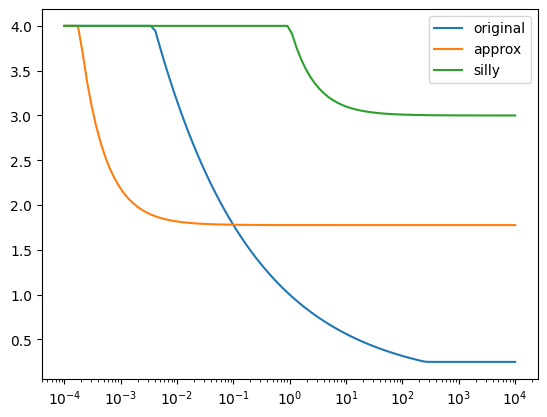

In [344]:
def original(x):
    x = np.power(x, -1/4)
    return x
    #return np.clip(x, 0.25, 4.0)

def approx_generic(x, *p):
    x = p[4] + p[5] / x
    x = 1 / x
    x = p[2] + p[3] / x
    x = 1 / x
    x = p[0] + p[1] / x
    return x

def make_approx(p):
    def approx(x):
        x = approx_generic(x, *p)
        return x
        #return np.clip(x, 0.25, 4.0)
    return approx

x = np.linspace(-4, 4, 100)
x = np.power(10, x)

y1 = original(x)

popt, pcov = scipy.optimize.curve_fit(approx_generic, x, y, p0=(1, 1, 1, 1, 1, 1), maxfev=10000000)
print(popt, pcov)
approx = make_approx(popt)

y2 = approx(x)
y3 = make_approx((1, 1, 1, 1, 1, 1))(x)

plt.gca().set_xscale("log")
plt.plot(x, np.clip(y1, 0.25, 4.0), label="original")
plt.plot(x, np.clip(y2, 0.25, 4.0), label="approx")
plt.plot(x, np.clip(y3, 0.25, 4.0), label="silly")
plt.legend()

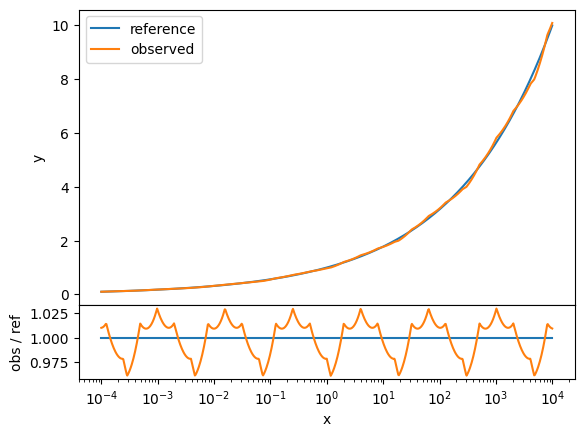

In [362]:
# using https://martin.ankerl.com/2012/01/25/optimized-approximative-pow-in-c-and-cpp

a, ref, obs = np.loadtxt("2024-04-28_sqrtsqrt_approx.txt").T

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={"height_ratios": [4, 1]})
fig.subplots_adjust(hspace=0)

ax1.plot(a, ref, label="reference")
ax1.plot(a, obs, label="observed")

ax2.plot(a, np.ones(ref.shape), label="reference")
ax2.plot(a, obs / ref, label="observed")

ax1.set_xscale("log")
ax1.set_ylabel("y")
ax2.set_ylabel("obs / ref")
ax2.set_xlabel("x")

ax1.legend();

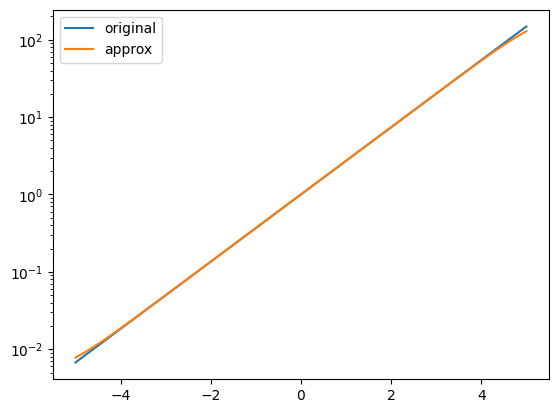

In [371]:
# approximate e^x

def approx_e(x):
    f = 14
    f = 10 + x**2 / f
    f = 6 + x**2 / f
    f = 2 - x + x**2 / f
    f = 1 + 2*x / f
    return f

x = np.linspace(-5, 5, 100)

y1 = np.exp(x)
y2 = approx_e(x)

plt.gca().set_yscale("log")
plt.plot(x, y1, label="original")
plt.plot(x, y2, label="approx")
plt.legend()

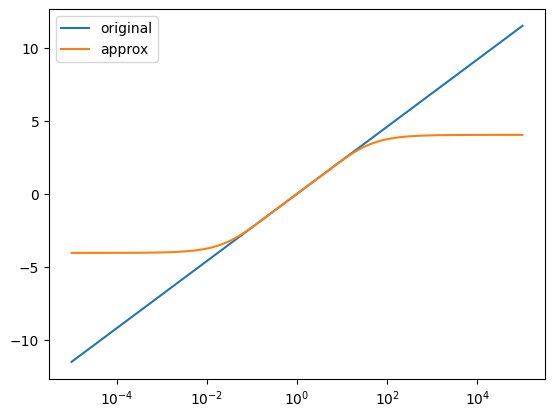

In [386]:
# approximate ln(x)

def approx_ln(x):
    f = (x - 1) / (x + 1)
    return 2 * (
        f +
        f**3 / 3 +
        f**5 / 5 +
        f**7 / 7 +
        f**9 / 9 +
        f**11 / 11 +
        f**13 / 13 +
        f**15 / 15
    )

x = np.linspace(-5, 5, 100)
x = np.power(10, x)

y1 = np.log(x)
y2 = approx_ln(x)

plt.gca().set_xscale("log")
plt.plot(x, y1, label="original")
plt.plot(x, y2, label="approx")
plt.legend()

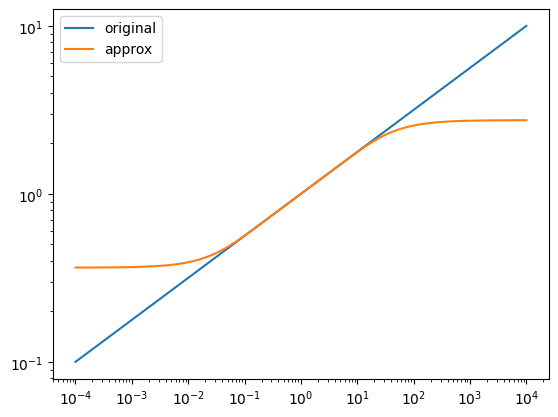

In [392]:
x = np.linspace(-4, 4, 100)
x = np.power(10, x)

def approx(a, b):
    return approx_e(approx_ln(a)*b)

b = 0.25

y1 = np.power(x, b)
y2 = approx(x, b)

plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.plot(x, y1, label="original")
plt.plot(x, y2, label="approx")
plt.legend()